

 -------------------- 


PART 1: Initial data
DESCRIPTION: Prepare table


 -------------------- 


1. Read the csv file (use the read_csv function):

                                                Name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   

                     Author  User Rating  Reviews  Price  Year        Genre  
0                  JJ Smith         4.70    17350      8  2016  Non Fiction  
1              Stephen King         4.60     2052     22  2011      Fiction  
2        Jordan B. Peterson         4.70    18979     15  2018  Non Fiction  
3             George Orwell         4.70    21424      6  2017      Fiction  
4  National Geographic Kids         4.80     7665     12  2019  Non Fiction  


2. Output the first five lines (the head

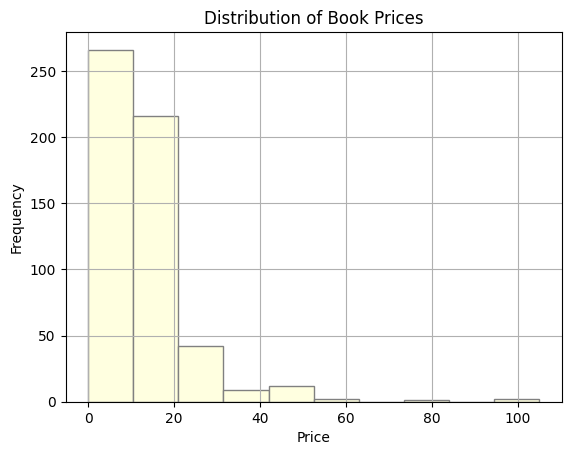



 -------------------- 


PART 3: Data search and sorting
DESCRIPTION: Analysis of Book Ratings, Reviews, and Prices


 -------------------- 


- `Question`  What is the highest rating in the dataset? - `Answer`  4.9
- `Question`  How many books have such rating? - `Answer`  52
- `Question`  Which book has the most reviews? - `Answer`  Where the Crawdads Sing
- `Question`  Among the books that made it to the Top 50 in 2015, 
              which one is the most expensive (you can use an intermediate dataframe)? - 
              `Answer` Publication Manual of the American Psychological Association, 6th Edition
- `Question`  How many Fiction genre books made it to the Top 50 in 2010 (use &)? - `Answer`  17
- `Question`  How many books with a rating of 4.9 made it 
              to the rating in 2010 and 2011 (use | or the isin function)? - `Answer` 1
~~~~~~~~~~~~~~~~~~~~ 




Finally, let's sort all books that made it to the rating in 2015 and cost
less than $8 in ascending order of pric

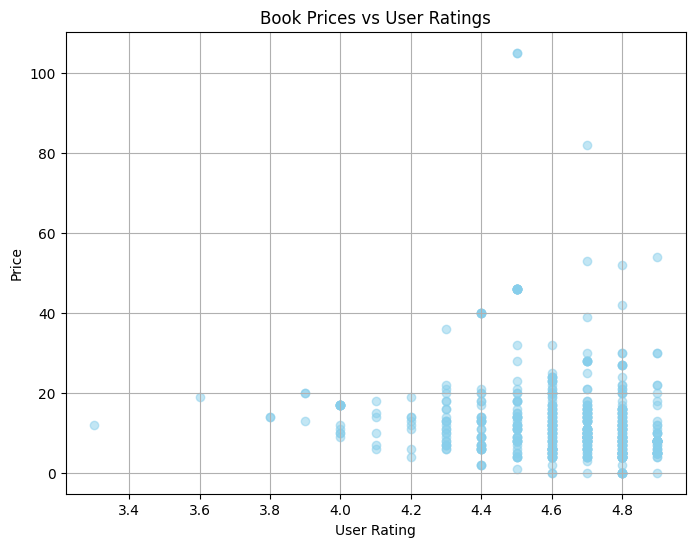


2. Box Plot of Book Prices by Genre



<ipython-input-32-423887f89db1>:340: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y="price", x="genre", data=df, palette="Pastel1", orient="v")


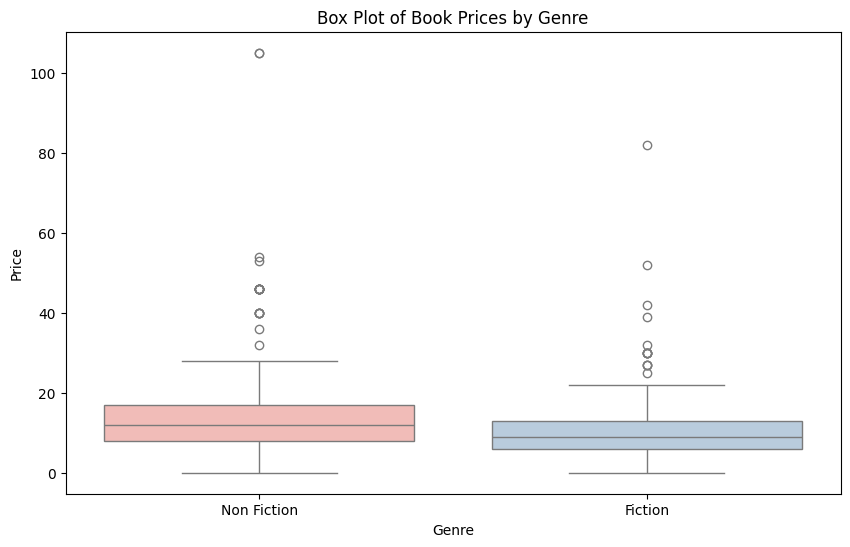


3. Average Rating of Books by All Authors Over Time



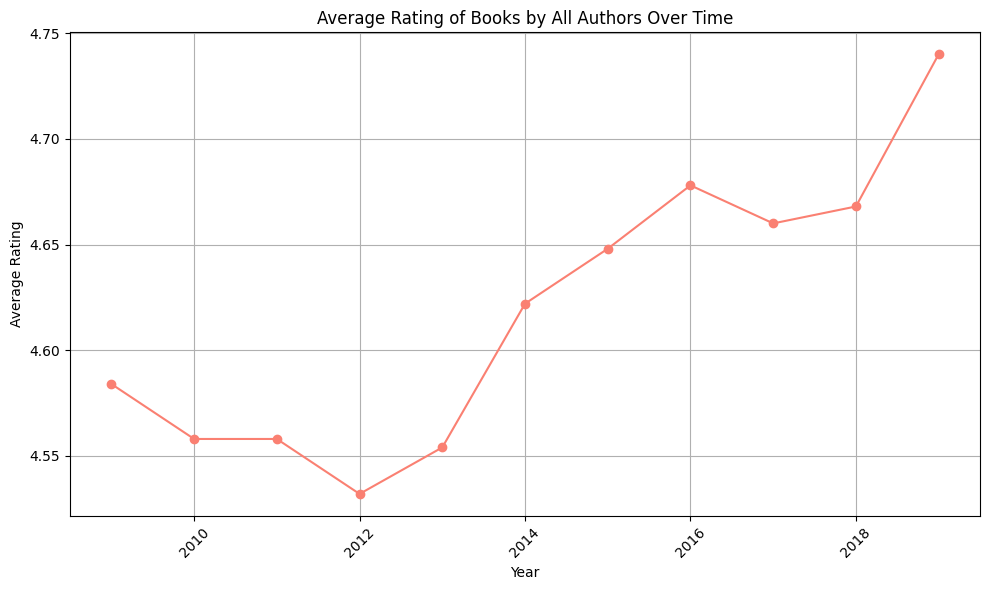

In [32]:
from io import StringIO

import matplotlib.pyplot as plt
import pandas as pd
import requests
import seaborn as sns

# Set display options
pd.set_option("display.float_format", lambda x: "%.2f" % x)
pd.set_option("display.max_columns", None)

# PART 1: Initial data
print("\n\n", "-" * 20, "\n\n")
print("PART 1: Initial data")
print("DESCRIPTION: Prepare table")
print("\n\n", "-" * 20, "\n\n")
# URL of the CSV file
url = "https://raw.githubusercontent.com/Anastasia-front/data-science/main/csv/bestsellers_with_categories.csv"

# Read the CSV file content from the URL
response = requests.get(url)
content = response.content.decode("utf-8")

# 1. Read the csv file (use the read_csv function)
df = pd.read_csv(StringIO(content))

# 2. Output the first five lines (the head function is used)
print("1. Read the csv file (use the read_csv function):\n")
print(df.head())

# 3. Display the dimensions of the dataset (use the shape attribute)
print(
    f"\n\n2. Output the first five lines (the head function is used) - \
{df.shape}\n"
)

# Question: How many books does the dataset store?
print(
    "- `Question`  How many books does the dataset store? - \
`Answer` , The number of books in the dataset: ",
    df.shape[0],
)

# Rename the column names
df.columns = ["name", "author", "user_rating", "reviews", "price", "year", "genre"]
print("\n\n", "-" * 20, "\n\n")

# PART 2: Initial data exploration
print("PART 2: Initial data exploration")
print("DESCRIPTION: Check Missing Values and Unique Genres")
print("\n\n", "-" * 20, "\n\n")

# 1. Check if all rows have enough data: output the number of missing values (na)
#  in each of the columns (use the isna and sum functions)
print(
    """1. Check if all rows have enough data: output the number of missing
values (na) in each of the columns (use the isna and sum functions):\n"""
)
print(df.isna().sum(), "\n")
print(
    "- `Question`  Are there any missing values in any of the variables? - \
`Answer`  No"
)

# 2. Check what unique values are in the "genre" column (use the unique function).
print(
    "\n\n2. Check what unique values are in the 'genre' column (use the unique function):"
)
print(
    "- `Question`  What are the unique genres? - \
`Answer` ",
    df["genre"].unique(),
)

# 3. Determine the maximum, minimum, mean, and median prices
#  (use the max, min, mean, and median functions)
print(
    "\n\n3. Determine the maximum, minimum, mean, and median prices \
(use the max, min, mean, and median functions):\n"
)
print(
    "- `Question`  What is the maximum price? - \
`Answer` ",
    df["price"].max(),
)
print(
    "- `Question`  What is the minimum price? - \
`Answer` ",
    df["price"].min(),
)
print(
    "- `Question`  What is the mean price? - \
`Answer` ",
    df["price"].mean(),
)
print(
    "- `Question` What is the median price? - \
`Answer` ",
    df["price"].median(),
)

# 4. Now, look at the distribution of prices: create a histogram (use kind='hist')
print("\n\n4. Create a histogram (use kind='hist'):\n")
plt.hist(df["price"], bins=10, color="lightyellow", edgecolor="grey")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Distribution of Book Prices")
plt.grid(True)
plt.show()
print("\n\n", "-" * 20, "\n\n")


# PART 3: Data search and sorting
print("PART 3: Data search and sorting")
print("DESCRIPTION: Analysis of Book Ratings, Reviews, and Prices")
print("\n\n", "-" * 20, "\n\n")

# - `Question`  What is the highest rating in the dataset?
print(
    "- `Question`  What is the highest rating in the dataset? - \
`Answer` ",
    df["user_rating"].max(),
)

# - `Question`  How many books have such rating?
print(
    "- `Question`  How many books have such rating? - \
`Answer` ",
    df[df["user_rating"] == df["user_rating"].max()]["user_rating"].count(),
)

# - `Question`  Which book has the most reviews?
print(
    "- `Question`  Which book has the most reviews? - \
`Answer` ",
    df[df["reviews"] == df["reviews"].max()]["name"].iloc[0],
)

# - `Question`  Among the books that made it to the Top 50 in 2015,
# which one is the most expensive (you can use an intermediate dataframe)?
top_2015 = df[df["year"] == 2015]
print(
    f"""- `Question`  Among the books that made it to the Top 50 in 2015,
              which one is the most expensive (you can use an intermediate dataframe)? -
              `Answer` {top_2015[top_2015['price'] == top_2015['price'].max()]['name'].iloc[0]}"""
)


# - `Question`  How many Fiction genre books made it to the Top 50 in 2010 (use &)?
print(
    "- `Question`  How many Fiction genre books made it to the Top 50 in 2010 (use &)? - \
`Answer` ",
    top_2015[top_2015["genre"] == "Fiction"]["name"].count(),
)

# - `Question`  How many books with a rating of 4.9 made it to the rating in 2010 and 2011 (use | or the isin function)?
print(
    f"""- `Question`  How many books with a rating of 4.9 made it
              to the rating in 2010 and 2011 (use | or the isin function)? \
- `Answer` {df[(df['user_rating'] == 4.9) & ((df['year'] == 2010) | (df['year'] == 2011))]['name'].count()}"""
)
print("~" * 20, "\n\n")
# Finally, let's sort all books that made it to the rating in 2015 and cost less
# than $8 in ascending order of price (use the sort_values function).
print(
    """\n\nFinally, let's sort all books that made it to the rating in 2015 and cost
less than $8 in ascending order of price (use the sort_values function).\n"""
)
print(top_2015[top_2015["price"] < 8].sort_values(by="price")["name"])
print("~" * 20, "\n\n")

# - `Question`  What is the last book in the sorted list?
print(
    "\n- `Question`  What is the last book in the sorted list? - \
`Answer` ",
    top_2015[top_2015["price"] < 8].sort_values(by="price")["name"].iloc[-1],
)
print("\n\n", "-" * 20, "\n\n")

# PART 4: Data aggregation and table merging
print("PART 4: Data aggregation and table merging")
print("DESCRIPTION: Aggregate Book Prices by Genre and Author")
print("\n\n", "-" * 20, "\n\n")

# 1. First, let's look at the maximum and minimum prices for each genre
#  (use the groupby and agg functions, for counting minimum and maximum values,
#   use max and min). Do not take all columns, select only those you need.
print(
    """1. First, let's look at the maximum and minimum prices for each genre
  (use the groupby and agg functions, for counting minimum and maximum values,
  use max and min). Do not take all columns, select only those you need.\n"""
)
genre_prices = df.groupby("genre").agg({"price": ["max", "min"]})
print(genre_prices, "\n")

# 2. `Question`  What is the maximum price for the Fiction genre?
print(
    "- `Question`  What is the maximum price for the Fiction genre? - \
`Answer` ",
    genre_prices.loc["Fiction", ("price", "max")],
)

# 3. `Question`  What is the minimum price for the Fiction genre?
print(
    "- `Question`  What is the minimum price for the Fiction genre? - \
`Answer` ",
    genre_prices.loc["Fiction", ("price", "min")],
)

# 4. `Question`  What is the maximum price for the Non Fiction genre?
print(
    "- `Question`  What is the maximum price for the Non Fiction genre? - \
`Answer` ",
    genre_prices.loc["Non Fiction", ("price", "max")],
)

# 5. `Question`  What is the minimum price for the Non Fiction genre?
print(
    "- `Question`  What is the minimum price for the Non Fiction genre? - \
`Answer` ",
    genre_prices.loc["Non Fiction", ("price", "min")],
    "\n",
)

print("~" * 20, "\n\n")

# 6. Create a new dataframe that will contain the number of books for each author
#  (use the groupby and agg functions, for counting, use count). Do not take all columns, select only those you need.
print(
    """2. Now, create a new dataframe that will contain the number
of books for each author (use the groupby and agg functions, for counting,
use count). Do not take all columns, select only those you need.\n"""
)
author_books = df.groupby("author").agg({"name": "count"})
print(author_books, "\n")

# 7. `Question`  What is the dimension of the resulting table?
print(
    "- `Question`  What is the dimension of the resulting table? - \
`Answer` ",
    author_books.shape,
)

# 8. `Question`  Which author has the most books?
print(
    "- `Question`  Which author has the most books? - \
`Answer` ",
    author_books[author_books["name"] == author_books["name"].max()].index[0],
)

# 9. `Question`  How many books does this author have?
most_books_author = author_books[
    author_books["name"] == author_books["name"].max()
].index[0]
print(
    "- `Question`  How many books does this author have? - \
`Answer` ",
    author_books.loc[most_books_author, "name"],
    "\n",
)
print("~" * 20, "\n\n")

# 10. Create a second dataframe that will contain the average rating for each author
#  (use the groupby and agg functions, for calculating the average value, use mean).
# Do not take all columns, select only those you need.
author_rating = df.groupby("author").agg({"user_rating": "mean"})
print(
    """3. Now create a second dataframe that will contain the average
rating for each author (use the groupby and agg functions, for calculating
the average value, use mean). Do not take all columns, select only those you need.\n"""
)
print(author_rating, "\n")

# 11. `Question`  Which author has the minimum average rating?
print(
    "- `Question`  Which author has the minimum average rating? - \
`Answer` ",
    author_rating[
        author_rating["user_rating"] == author_rating["user_rating"].min()
    ].index[0],
)

# 12. `Question`  What is the average rating for this author?
min_rating_author = author_rating[
    author_rating["user_rating"] == author_rating["user_rating"].min()
].index[0]
print(
    "- `Question`  What is the average rating for this author? - \
`Answer` ",
    author_rating.loc[min_rating_author, "user_rating"],
    "\n",
)
print("~" * 20, "\n\n")

# 13. Merge the last two dataframes so that for each author, you can see the number
# of books and the average rating (use the concat function with the axis parameter).
# Save the result in a variable.
print(
    """4. Merge the last two dataframes so that for each author,
you can see the number of books and the average rating (use the concat function
with the axis parameter). Save the result in a variable.\n"""
)
merged_df = pd.concat([author_books, author_rating], axis=1)
print(merged_df, "\n")
print("~" * 20, "\n\n")

# 14. Sort the dataframe in ascending order of the number of books and the rating (use the sort_values function).
print(
    "5. Sort the dataframe in ascending order of the number of books and the rating (use the sort_values function).\n"
)
sorted_df = merged_df.sort_values(by=["name", "user_rating"])
print(sorted_df, "\n")

# 15. `Question`  Which author is first on the list?
print(
    "- `Question`  Which author is first on the list? - \
`Answer` ",
    sorted_df.iloc[0].name,
)
print("\n\n", "-" * 20, "\n\n")

# 16. Vizualization
print("PART 5: Vizualization")
print("\n\n", "-" * 20, "\n\n")

# Plot 1: Scatter Plot of Book Prices vs User Ratings
print("1. Scatter Plot of Book Prices vs User Ratings \n")
plt.figure(figsize=(8, 6))
plt.scatter(df["user_rating"], df["price"], color="skyblue", alpha=0.5)
plt.xlabel("User Rating")
plt.ylabel("Price")
plt.title("Book Prices vs User Ratings")
plt.grid(True)
plt.show()
print()

# Plot 2: Box Plot of Book Prices by Genre
print("2. Box Plot of Book Prices by Genre\n")
plt.figure(figsize=(10, 6))
sns.boxplot(y="price", x="genre", data=df, palette="Pastel1", orient="v")
plt.title("Box Plot of Book Prices by Genre")
plt.xlabel("Genre")
plt.ylabel("Price")
plt.show()
print()

# Plot 3: Average Rating of Books by All Authors Over Time
print("3. Average Rating of Books by All Authors Over Time\n")
# Convert 'year' column to datetime format
df["year"] = pd.to_datetime(df["year"], format="%Y")
# Group the data by year and calculate the average rating for each year
average_rating_by_year = df.groupby(df["year"].dt.year)["user_rating"].mean()
# Plot the time series
plt.figure(figsize=(10, 6))
average_rating_by_year.plot(marker="o", color="salmon")
plt.title("Average Rating of Books by All Authors Over Time")
plt.xlabel("Year")
plt.ylabel("Average Rating")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
